In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt
import os
from iob import style_transfer, utils

In [2]:
%cd ../

d:\dev\project\Neural-Style-Transfer


torch.Size([1, 3, 512, 761]) torch.Size([1, 3, 512, 570])


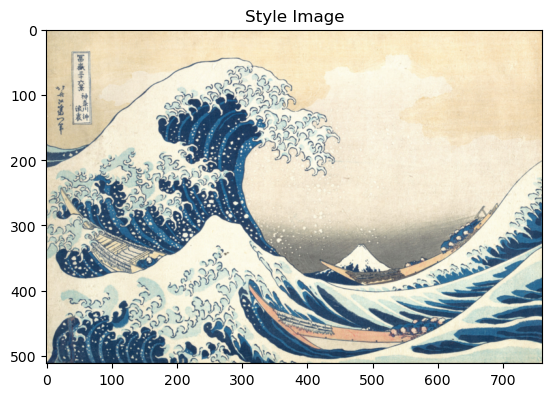

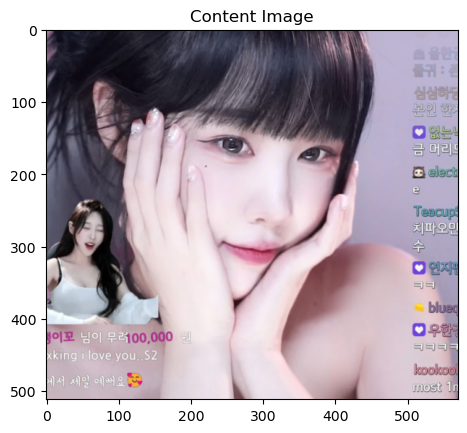

In [3]:
content_path = os.path.join(os.getcwd(), 'content_images')
style_path = os.path.join(os.getcwd(), 'style_images')
output_path = os.path.join(os.getcwd(), 'output_images')

content_img_name = "girl.jpg"
style_img_name = "tsunami.jpg"
ctin = content_img_name.split('.')[0]
stin = style_img_name.split('.')[0]

# imsize = (480, 512)

content_img = utils.image_loader(os.path.join(content_path, content_img_name))
style_img = utils.image_loader(os.path.join(style_path, style_img_name))

print(style_img.size(), content_img.size())
# assert style_img.size() == content_img.size(), \
#     "Style and content images must be the same size"

plt.figure()
utils.imshow(style_img, title='Style Image')

plt.figure()
utils.imshow(content_img, title='Content Image')

In [5]:
model = style_transfer.StyleTransfer()

output = model.run_style_transfer(os.path.join(content_path, content_img_name), os.path.join(style_path, style_img_name), num_steps=500, lr = 0.05, return_tensor=True, preserve_color=False, beta = 1e5)

d:\anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([1, 3, 512, 570]) torch.Size([1, 3, 512, 570])


d:\dev\project\Neural-Style-Transfer\src\iob\layers.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1).to(device)
d:\dev\project\Neural-Style-Transfer\src\iob\layers.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1).to(device)


Optimizing...
Step 50: Style Loss: 0.003870 Content Loss: 11.215176
Step 100: Style Loss: 0.001506 Content Loss: 14.354671
Step 150: Style Loss: 0.000448 Content Loss: 17.401049
Step 200: Style Loss: 0.000155 Content Loss: 17.210890
Step 250: Style Loss: 0.000080 Content Loss: 15.858286
Step 300: Style Loss: 0.000050 Content Loss: 14.910229
Step 350: Style Loss: 0.000037 Content Loss: 14.084915
Step 400: Style Loss: 0.000028 Content Loss: 13.694428
Step 450: Style Loss: 0.000023 Content Loss: 13.481636
Step 500: Style Loss: 0.000019 Content Loss: 13.305300


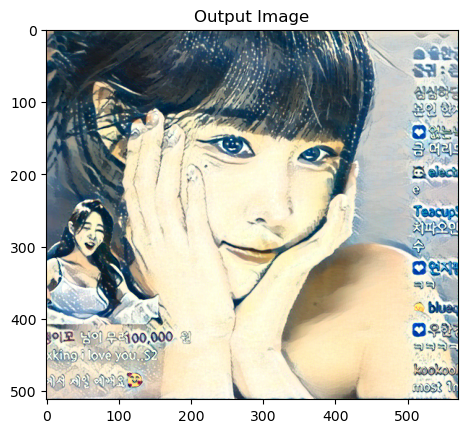

In [6]:
plt.figure()
utils.imshow(output, title='Output Image')
plt.ioff()
plt.show()

In [7]:
content_img.shape, output.shape

(torch.Size([1, 3, 512, 570]), torch.Size([1, 3, 512, 570]))

In [8]:
output_img = utils.image_unloader(output)
output_img.save(os.path.join(output_path, f'{ctin}_styled_as_{stin}.jpg'))

In [9]:
original_color_output = utils.preserve_color_lab(content_img, output)
original_color_output = utils.image_unloader(original_color_output)
original_color_output.save(os.path.join(output_path, f'{ctin}_styled_as_{stin}_preserve_color.jpg'))
# plt.figure()
# utils.imshow(original_color_output, title='Output Image')
# plt.ioff()
# plt.show()